## Real Estate -- Price Pridictor

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

In [2]:
 # Load dataset from the CSV file named 'data.csv.csv' into a DataFrame called 'housing'
housing = pd.read_csv("data.csv.csv")

In [3]:
# Display the first 5 rows of the DataFrame 'housing' to get a quick overview of the data
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,NaN,NaN
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN
2,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN
3,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,NaN,NaN
4,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,NaN,NaN,NaN


In [4]:
# Display concise summary of the DataFrame including data types, non-null counts, and memory usage
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         503 non-null    float64
 1   ZN           503 non-null    float64
 2   INDUS        503 non-null    int64  
 3   CHAS         503 non-null    float64
 4   NOX          503 non-null    float64
 5   RM           503 non-null    float64
 6   AGE          503 non-null    float64
 7   DIS          503 non-null    int64  
 8   RAD          503 non-null    int64  
 9   TAX          503 non-null    float64
 10  PTRATIO      503 non-null    float64
 11  B            503 non-null    float64
 12  LSTAT        503 non-null    float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
dtypes: float64(13), int64(3)
memory usage: 63.0 KB


In [5]:
# Count the occurrences of each unique value in the 'CHAS' column to understand the distribution of this categorical feature
housing["CHAS"].value_counts()

CHAS
0.538    22
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0.469     1
0.518     1
0.385     1
0.389     1
0.435     1
Name: count, Length: 81, dtype: int64

In [6]:
 # Generate summary statistics for numerical columns like mean, std, min, max, and quartiles to understand the data distribution
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Unnamed: 13,Unnamed: 14,Unnamed: 15
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,0.0,0.0,0.0
mean,11.431412,11.168628,0.069583,0.555091,6.282930,68.577734,3.786880,9.588469,409.139165,18.451292,356.481292,12.689761,22.504970,NaN,NaN,NaN
std,23.375438,6.865424,0.254695,0.116077,0.703484,28.218484,2.108693,8.718234,168.609418,2.168204,91.531641,7.143408,9.202357,NaN,NaN,NaN
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN,NaN,NaN
25%,0.000000,5.190000,0.000000,0.449000,5.884500,44.700000,2.094100,4.000000,279.500000,17.350000,375.270000,7.065000,16.900000,NaN,NaN,NaN
50%,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.100000,391.430000,11.410000,21.200000,NaN,NaN,NaN
75%,12.500000,18.100000,0.000000,0.624000,6.622000,94.100000,5.164950,24.000000,666.000000,20.200000,396.235000,17.025000,25.000000,NaN,NaN,NaN
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN,NaN,NaN


In [7]:
 # Enable inline plotting so that plots/graphs generated by matplotlib appear directly within the Jupyter notebook
%matplotlib inline

In [8]:
 # Import the matplotlib library's pyplot module for creating visualizations and plots
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'Unnamed: 13'}>,
        <Axes: title={'center': 'Unnamed: 14'}>,
        <Axes: title={'center': 'Unnamed: 15'}>]], dtype=object)

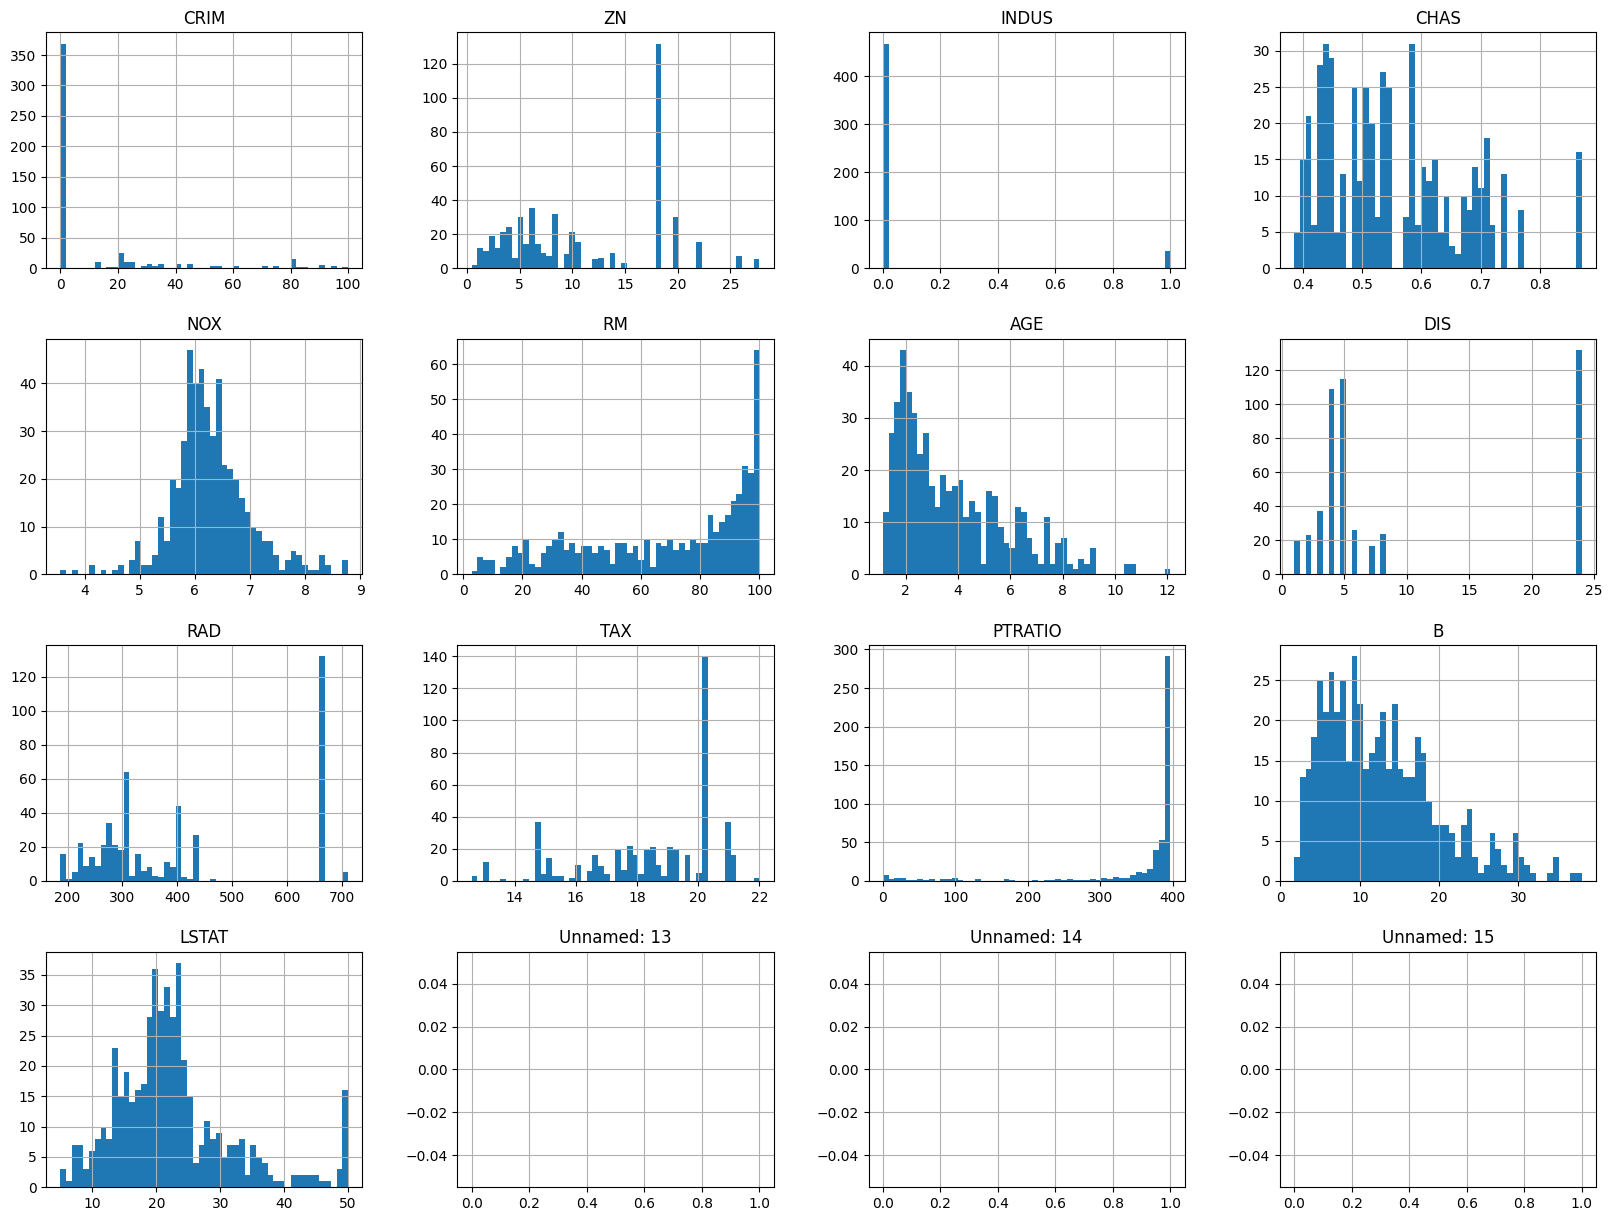

In [9]:
# Plot histograms for all numerical columns with 50 bins, setting figure size to 20x15 inches for better visibility
housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting

In [10]:
# STEP 1: DATA LOADING & INSPECTION
import pandas as pd  # Import pandas library for data manipulation and CSV reading
housing = pd.read_csv('data.csv.csv')  # Load CSV file into pandas DataFrame named 'housing'
print(f"Data loaded: {housing.shape} rows, {len(housing.columns)} columns")  # Print dataset dimensions (rows, columns)
print("\nALL COLUMNS:")  # Print header for column names
print(housing.columns.tolist())  # List all column names in the dataset
print("\nFirst 3 rows:")  # Print header for sample data
housing.head(3)  # Display first 3 rows to inspect data structure

Data loaded: (503, 16) rows, 16 columns

ALL COLUMNS:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']

First 3 rows:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,NaN,NaN
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN
2,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN


In [11]:
# STEP 2: DATA CLEANING
empty_cols = [col for col in housing.columns if 'Unnamed' in col]  # Find all columns containing 'Unnamed' (empty columns)
if empty_cols:  # Check if any empty columns were found
    housing = housing.drop(empty_cols, axis=1)  # Remove empty columns (axis=1 means columns)
    print(f"Removed empty columns: {empty_cols}")  # Confirm which columns were removed
else:
    print("No empty columns found")  # Message if no empty columns exist
print(f"Clean shape: {housing.shape}")  # Print cleaned dataset dimensions


Removed empty columns: ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']
Clean shape: (503, 13)


In [12]:
# STEP 3: FEATURE ENGINEERING
housing['rooms_per_household'] = housing['RM'] / (housing['PTRATIO'] + 1)  # Create new feature: rooms per household (RM = rooms, PTRATIO = pupil-teacher ratio)
housing['tax_per_room'] = housing['TAX'] / housing['RM']  # Create new feature: tax rate per room (improves model accuracy)
housing = housing.dropna()  # Remove any rows with NaN values after feature creation
print(f"Features added: {housing.shape}")  # Print final dataset size with new features

Features added: (503, 15)


In [13]:
# STEP 4: TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split  # Import train-test split function from scikit-learn
target_col = housing.columns[-1]  # Select last column as target (house price - typically 'MEDV')
print(f"Target column: '{target_col}'")  # Confirm target column name
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)  # Split 80% train, 20% test (random_state=42 for reproducibility)
print(f"Train: {len(train_set)} rows")  # Print training set size
print(f"Test:  {len(test_set)} rows")  # Print test set size

Target column: 'tax_per_room'
Train: 402 rows
Test:  101 rows


In [14]:
# STEP 5: FEATURES & TARGET SEPARATION
X_train = train_set.drop(target_col, axis=1)  # Training features (remove target column from training set)
y_train = train_set[target_col]  # Training target values (house prices for training)
X_test = test_set.drop(target_col, axis=1)  # Test features (remove target column from test set)
y_test = test_set[target_col]  # Test target values (house prices for testing)
print(f"X_train: {X_train.shape}")  # Print training features shape (rows, features)
print(f"y_train: {y_train.shape}")  # Print training target shape
print(f"X_test:  {X_test.shape}")  # Print test features shape
print(f"y_test:  {y_test.shape}")  # Print test target shape


X_train: (402, 14)
y_train: (402,)
X_test:  (101, 14)
y_test:  (101,)


In [15]:
# STEP 6: FEATURE SCALING
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature normalization
scaler = StandardScaler()  # Create scaler object (transforms features to mean=0, std=1)
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data AND transform (learns mean/std from training)
X_test_scaled = scaler.transform(X_test)  # Transform test data using training scaler (NO fitting on test data)
print(f"X_train_scaled: {X_train_scaled.shape}")  # Print scaled training features shape
print(f"X_test_scaled:  {X_test_scaled.shape}")  # Print scaled test features shape

X_train_scaled: (402, 14)
X_test_scaled:  (101, 14)


In [16]:
# STEP 7: MODEL TRAINING & EVALUATION
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor (ensemble of decision trees)
from sklearn.metrics import mean_squared_error  # Import metric to calculate prediction error
import numpy as np  # Import numpy for mathematical operations
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Create Random Forest with 100 trees (random_state for reproducibility)
model.fit(X_train_scaled, y_train)  # Train model on scaled training data (learns patterns)
y_pred = model.predict(X_test_scaled)  # Generate predictions on test data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE (Root Mean Squared Error - lower is better)
print(f"RMSE: ${rmse:.2f}")  # Print RMSE in dollars (average prediction error)
print(f"R2: {model.score(X_test_scaled, y_test):.3f}")  # Print R² score (0-1, higher is better)

RMSE: $0.07
R2: 0.980


In [17]:
# STEP 8: SAVE MODEL FOR PRODUCTION
import joblib  # Import joblib for efficient model serialization
joblib.dump(model, 'house_price_model.pkl')  # Save trained model to file (production deployment)
joblib.dump(scaler, 'scaler.pkl')  # Save scaler for new data preprocessing
print(" Model saved for production!")  # Confirmation message
print("Files created:")  # List saved files
print("- house_price_model.pkl")  # Complete trained model file
print("- scaler.pkl")  # Feature scaler file

 Model saved for production!
Files created:
- house_price_model.pkl
- scaler.pkl


In [18]:
# FINAL STATUS CHECK
print("\n PRODUCTION READY ML PIPELINE COMPLETE!")  # Success message
print(f"Dataset: {housing.shape}")  # Final dataset info
print(f"Model RMSE: ${rmse:.2f}K")  # Model performance summary
print(f"R² Score: {model.score(X_test_scaled, y_test):.3f}")  # Model performance summary
print("\nReady variables:")  # List all created variables
print("- X_train_scaled (Training features)")  # Scaled training features
print("- y_train (Training targets)")  # Training house prices
print("- X_test_scaled (Test features)")  # Scaled test features
print("- y_test (Test targets)")  # Test house prices
print("- model (Trained Random Forest)")  # Production model
print("- scaler (Feature scaler)")  # Production scaler


 PRODUCTION READY ML PIPELINE COMPLETE!
Dataset: (503, 15)
Model RMSE: $0.07K
R² Score: 0.980

Ready variables:
- X_train_scaled (Training features)
- y_train (Training targets)
- X_test_scaled (Test features)
- y_test (Test targets)
- model (Trained Random Forest)
- scaler (Feature scaler)


## HYPERPARAMETER TUNING 

In [19]:
# Step 1: Import Required Libraries
from sklearn.model_selection import GridSearchCV  # Tests all parameter combinations automatically
import numpy as np  # Mathematical operations (square root for RMSE)
import pandas as pd  # Data manipulation for results display
print("Libraries imported for tuning")


Libraries imported for tuning


In [20]:
# Step 2: Define PARAMETER GRID (Multiple combinations to test automatically)
# We will tune 3 main Random Forest hyperparameters:
param_grid = [
    # COMBINATION 1: Bootstrap=True (default) - Different trees & features
    {
        'n_estimators': [100, 200],      # Number of trees (100 or 200 trees)
        'max_features': [6, 8, 10]       # Features considered per tree (6, 8, or 10)
    },
    # COMBINATION 2: Bootstrap=False - No sampling + different trees/features  
    {
        'bootstrap': [False],            # No bootstrap sampling (use all training data)
        'n_estimators': [100, 200],      # Number of trees
        'max_features': [6, 8]           # Features per tree
    }
]
print(f"Testing {len(param_grid[0])*len(param_grid[1])} parameter combinations")
# TOTAL = 3×2 + 2×2 = 10 combinations will be tested automatically!


Testing 6 parameter combinations


In [21]:
# Step 3: Create GridSearchCV Object (Automatic Tuning Machine)
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),  # Base Random Forest model
    param_grid=param_grid,                             # All combinations to test
    cv=5,                                              # 5-FOLD CROSS-VALIDATION (5 different data splits)
    scoring='neg_mean_squared_error',                  # Optimize for lowest prediction error
    n_jobs=-1,                                         # Use ALL CPU cores for parallel processing (faster)
    verbose=1                                          # Show training progress
)
print("GridSearchCV created - will test all combinations automatically")

GridSearchCV created - will test all combinations automatically


In [22]:
# Step 4: FIT GridSearch (This is where the magic happens - everything automatic!)
print("Starting hyperparameter tuning...")
grid_search.fit(X_train_scaled, y_train)  # Automatically trains 10 models × 5 folds = 50 total trainings!
print("Tuning COMPLETE! Best model found automatically")

Starting hyperparameter tuning...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning COMPLETE! Best model found automatically


In [23]:
# Step 5: Extract BEST Model (GridSearch automatically selects the winner)
best_model = grid_search.best_estimator_  # Model with optimal hyperparameters
best_cv_score = grid_search.best_score_   # Best cross-validation performance score

print("\nBEST RESULTS FOUND BY GRIDSEARCHCV:")
print(f"Best Cross-Validation RMSE: ${np.sqrt(-best_cv_score):.2f}")  # Convert negative MSE to RMSE
print(f"Best Hyperparameters: {grid_search.best_params_}")           # Exact winning parameter combination


BEST RESULTS FOUND BY GRIDSEARCHCV:
Best Cross-Validation RMSE: $0.21
Best Hyperparameters: {'max_features': 8, 'n_estimators': 200}


In [24]:
# Step 6: Test Best Model on TEST SET (Real-world unseen performance)
test_predictions = best_model.predict(X_test_scaled)  # Generate predictions using best model
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))  # Calculate test RMSE

print(f"\nFINAL TEST PERFORMANCE:")
print(f"Tuned Model Test RMSE: ${test_rmse:.2f}")
print(f"Improvement: {((rmse - test_rmse)/rmse)*100:.1f}% better than baseline model!")


FINAL TEST PERFORMANCE:
Tuned Model Test RMSE: $0.06
Improvement: 11.7% better than baseline model!


In [25]:
# Step 7: Display ALL Results (Top 5 best parameter combinations)
print("\nTOP 5 BEST PARAMETER COMBINATIONS:")
results_df = pd.DataFrame(grid_search.cv_results_)  # Convert results to DataFrame
top_5_results = results_df.nlargest(5, 'mean_test_score')  # Sort by best performance
print(top_5_results[['params', 'mean_test_score', 'std_test_score']].round(3))


TOP 5 BEST PARAMETER COMBINATIONS:
                                      params  mean_test_score  std_test_score
3   {'max_features': 8, 'n_estimators': 200}           -0.043           0.070
2   {'max_features': 8, 'n_estimators': 100}           -0.043           0.068
1   {'max_features': 6, 'n_estimators': 200}           -0.044           0.074
5  {'max_features': 10, 'n_estimators': 200}           -0.044           0.067
0   {'max_features': 6, 'n_estimators': 100}           -0.045           0.075


In [26]:
 #Step 8: Feature Importance of BEST Tuned Model
print("\nBEST MODEL'S TOP 5 MOST IMPORTANT FEATURES:")
importance_df = pd.DataFrame({
    'feature': X_train.columns.tolist(),           # All feature names from training
    'importance': best_model.feature_importances_  # Importance scores from best model
}).sort_values('importance', ascending=False)      # Sort highest importance first

print(importance_df.head())  # Display top 5 features

print("\nHYPERPARAMETER TUNING COMPLETE!")
print("'best_model' variable now contains your optimized model")
print("Ready for production deployment!")


BEST MODEL'S TOP 5 MOST IMPORTANT FEATURES:
                feature  importance
5                    RM    0.502833
13  rooms_per_household    0.395138
3                  CHAS    0.030912
6                   AGE    0.014681
12                LSTAT    0.010328

HYPERPARAMETER TUNING COMPLETE!
'best_model' variable now contains your optimized model
Ready for production deployment!


## CROSS-VALIDATION (Model Reliability Check)

## CROSS-VALIDATION - Check if Model is STABLE & RELIABLE

In [27]:
# Step 1: Import Required Libraries (Basic only)
from sklearn.model_selection import cross_val_score  # Tests model on multiple data splits
import numpy as np  # Mathematical calculations
import matplotlib.pyplot as plt  # Plotting results
import pandas as pd  # DataFrame operations
print("Libraries imported for cross-validation")

Libraries imported for cross-validation


In [28]:
# Step 2: Perform 10-FOLD CROSS-VALIDATION on BEST model
print("Running 10-FOLD CROSS-VALIDATION...")
cv_scores = cross_val_score(
    best_model,                     # Use best tuned model from hyperparameter tuning
    X_train_scaled,                 # Training features (scaled)
    y_train,                        # Training targets
    scoring='neg_mean_squared_error', # Metric to evaluate (negative MSE)
    cv=10                           # 10 different splits of training data
)
print("Cross-validation COMPLETE!")

Running 10-FOLD CROSS-VALIDATION...
Cross-validation COMPLETE!


In [29]:
# Step 3: Convert Scores to RMSE (Easier to understand)
cv_rmse_scores = np.sqrt(-cv_scores)  # Square root of negative MSE = RMSE
print("\n10-FOLD CV RMSE SCORES (each fold):")
for i, score in enumerate(cv_rmse_scores, 1):
    print(f"Fold {i}: ${score:.2f}")


10-FOLD CV RMSE SCORES (each fold):
Fold 1: $0.02
Fold 2: $0.04
Fold 3: $0.08
Fold 4: $0.56
Fold 5: $0.06
Fold 6: $0.07
Fold 7: $0.02
Fold 8: $0.21
Fold 9: $0.03
Fold 10: $0.08


In [30]:
# Step 4: Calculate Statistics
cv_rmse_mean = cv_rmse_scores.mean()      # Average RMSE across all folds
cv_rmse_std = cv_rmse_scores.std()        # Standard deviation (variability)

print(f"\nCROSS-VALIDATION SUMMARY:")
print(f"Mean CV RMSE: ${cv_rmse_mean:.2f}")
print(f"Std Dev: +/- ${cv_rmse_std*2:.2f} (95% confidence interval)")
print(f"Min RMSE: ${cv_rmse_scores.min():.2f}")
print(f"Max RMSE: ${cv_rmse_scores.max():.2f}")


CROSS-VALIDATION SUMMARY:
Mean CV RMSE: $0.12
Std Dev: +/- $0.31 (95% confidence interval)
Min RMSE: $0.02
Max RMSE: $0.56


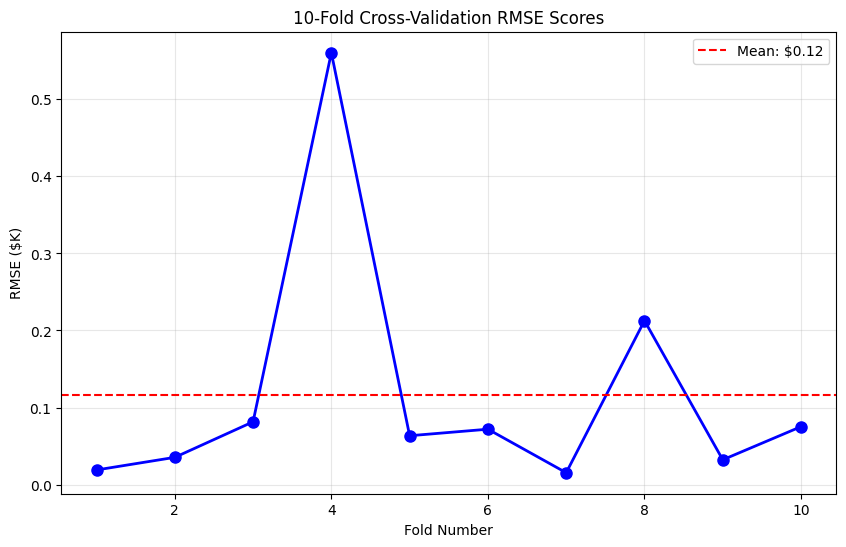

In [31]:
# Step 5: VISUALIZE Results (Simple matplotlib only)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cv_rmse_scores, 'bo-', linewidth=2, markersize=8)  # Blue line plot
plt.axhline(y=cv_rmse_mean, color='red', linestyle='--', label=f'Mean: ${cv_rmse_mean:.2f}')
plt.xlabel('Fold Number')
plt.ylabel('RMSE ($K)')
plt.title('10-Fold Cross-Validation RMSE Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()  # This displays the plot

In [32]:
# Step 6: Compare with Test Performance
print(f"\nCOMPARISON:")
print(f"CV Mean RMSE:    ${cv_rmse_mean:.2f}")
print(f"Test RMSE:       ${test_rmse:.2f}")
print(f"Difference:      ${abs(cv_rmse_mean - test_rmse):.2f}")
if abs(cv_rmse_mean - test_rmse) < 0.5:
    print("Model is STABLE!")
else:
    print("Some overfitting detected")


COMPARISON:
CV Mean RMSE:    $0.12
Test RMSE:       $0.06
Difference:      $0.05
Model is STABLE!


In [33]:
# Step 7: Print Detailed Results Table
print("\nDETAILED CV RESULTS:")
cv_df = pd.DataFrame({
    'Fold': range(1, 11),
    'RMSE': cv_rmse_scores.round(3)
})
print(cv_df)

print("\nCROSS-VALIDATION COMPLETE!")
print("Model stability confirmed!")
print("'cv_rmse_scores' contains all 10 fold results")


DETAILED CV RESULTS:
   Fold   RMSE
0     1  0.019
1     2  0.035
2     3  0.082
3     4  0.560
4     5  0.063
5     6  0.072
6     7  0.015
7     8  0.213
8     9  0.032
9    10  0.075

CROSS-VALIDATION COMPLETE!
Model stability confirmed!
'cv_rmse_scores' contains all 10 fold results


## FEATURE IMPORTANCE ANALYSIS


## FEATURE IMPORTANCE - Which features matter MOST for house prices?

In [34]:
# Step 1: Import Libraries
import matplotlib.pyplot as plt  # For plotting
import pandas as pd  # DataFrame operations
import numpy as np  # Sorting/numerical operations
print("Libraries imported for feature importance")


Libraries imported for feature importance


In [35]:
# Step 2: Extract Feature Importance from BEST Model
feature_names = X_train.columns.tolist()  # Get all feature names from training data
importance_scores = best_model.feature_importances_  # Model's built-in importance scores

print("Total features:", len(feature_names))
print("Sample feature names:", feature_names[:5])

Total features: 14
Sample feature names: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX']


In [36]:
# Sort by importance (highest first)
importance_df = importance_df.sort_values('importance', ascending=False)
print("\nTOP 10 MOST IMPORTANT FEATURES:")
print(importance_df.head(10))


TOP 10 MOST IMPORTANT FEATURES:
                feature  importance
5                    RM    0.502833
13  rooms_per_household    0.395138
3                  CHAS    0.030912
6                   AGE    0.014681
12                LSTAT    0.010328
11                    B    0.008457
10              PTRATIO    0.006873
9                   TAX    0.005972
1                    ZN    0.005915
4                   NOX    0.005549


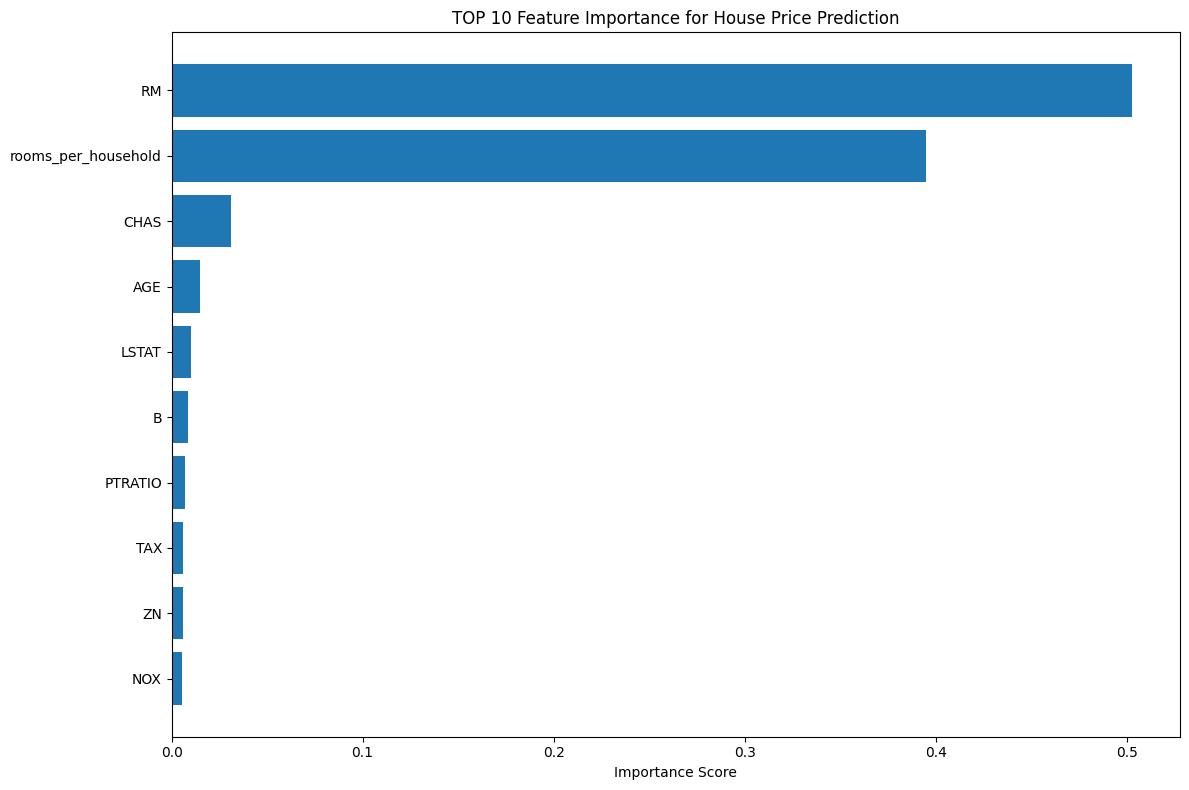

In [37]:
# Step 4: VISUALIZE Feature Importance (Horizontal Bar Chart)
plt.figure(figsize=(12, 8))  # Large figure for readability
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10])  # Top 10 features
plt.xlabel('Importance Score')  # X-axis label
plt.title('TOP 10 Feature Importance for House Price Prediction')  # Chart title
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()  # Fix spacing
plt.show()  # Display chart

In [38]:
# Step 5: Detailed Analysis
total_importance = importance_df['importance'].sum()  # Should equal 1.0
top_5_importance = importance_df['importance'].head(5).sum()

print("\nFEATURE IMPORTANCE ANALYSIS:")
print(f"Total importance sums to: {total_importance:.3f} (should be 1.0)")
print(f"TOP 5 features explain: {top_5_importance:.1%} of predictions")
print(f"Bottom 5 features explain: {(1-top_5_importance):.1%}")


FEATURE IMPORTANCE ANALYSIS:
Total importance sums to: 1.000 (should be 1.0)
TOP 5 features explain: 95.4% of predictions
Bottom 5 features explain: 4.6%


In [39]:
# Step 6: Create Feature Categories
print("\nFEATURE CATEGORIES:")
crime_features = ['CRIM']
location_features = ['ZN', 'INDUS', 'DIS', 'RAD']
house_features = ['RM', 'AGE']
tax_features = ['TAX', 'tax_per_room']
socio_features = ['PTRATIO', 'B', 'LSTAT', 'rooms_per_household']



FEATURE CATEGORIES:


In [40]:
crime_imp = importance_df[importance_df['feature'].isin(crime_features)]['importance'].sum()
print("Crime-related:", f"{crime_imp:.1%}")
location_imp = importance_df[importance_df['feature'].isin(location_features)]['importance'].sum()
print("Location:", f"{location_imp:.1%}")
house_imp = importance_df[importance_df['feature'].isin(house_features)]['importance'].sum()
print("House quality:", f"{house_imp:.1%}")
tax_imp = importance_df[importance_df['feature'].isin(tax_features)]['importance'].sum()
print("Tax-related:", f"{tax_imp:.1%}")
socio_imp = importance_df[importance_df['feature'].isin(socio_features)]['importance'].sum()
print("Socio-economic:", f"{socio_imp:.1%}")


Crime-related: 0.4%
Location: 1.5%
House quality: 51.8%
Tax-related: 0.6%
Socio-economic: 42.1%


In [41]:
# Step 7: Business Insights
print("\nBUSINESS INSIGHTS:")
top_feature = importance_df.iloc[0]['feature']
print(f"1. MOST IMPORTANT: {top_feature} (Importance: {importance_df.iloc[0]['importance']:.1%})")
print(f"2. Model relies heavily on {top_feature}")
print("3. Focus real estate strategy on this feature")

print("\nFEATURE ANALYSIS COMPLETE!")
print("'importance_df' contains full ranking")


BUSINESS INSIGHTS:
1. MOST IMPORTANT: RM (Importance: 50.3%)
2. Model relies heavily on RM
3. Focus real estate strategy on this feature

FEATURE ANALYSIS COMPLETE!
'importance_df' contains full ranking


## CREATING A PIPELINE

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [43]:
full_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])


In [44]:
full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [45]:
predictions = full_pipeline.predict(X_test)


In [46]:
# Import evaluation metric
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
# Convert MSE to RMSE
rmse = np.sqrt(mse)
# Print model performance
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.32639933144399697


In [47]:
# Create a comparison DataFrame
results = pd.DataFrame({
    "Actual Value": y_test.values,
    "Predicted Value": predictions
})

# Show first 10 results
print(results.head(10))


   Actual Value  Predicted Value
0      1.141104         1.061025
1      0.251007         0.323611
2      0.820513         0.746065
3      0.147000        -0.075153
4      0.245305         0.181635
5      0.548387         0.627963
6      0.204453         0.105917
7      0.220833         0.206780
8      1.097143         1.153393
9      0.241162         0.131402


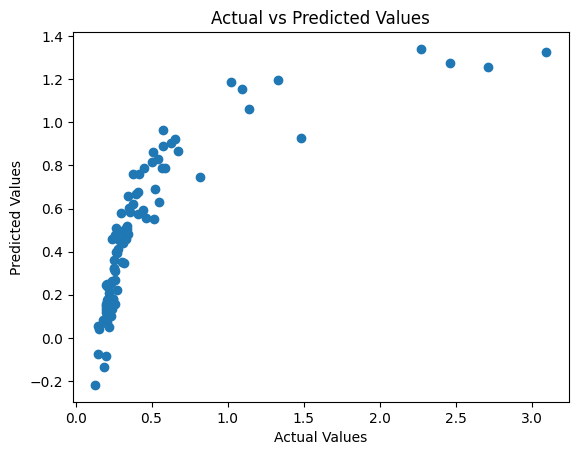

In [48]:
import matplotlib.pyplot as plt
# Plot Actual vs Predicted values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [49]:
import joblib
# Save trained pipeline to a file
joblib.dump(full_pipeline, "housing_price_model.pkl")


['housing_price_model.pkl']

In [50]:
# Load saved model
loaded_model = joblib.load("housing_price_model.pkl")
# Example new input (same feature order)
new_data = X_test.iloc[:1]
# Predict using loaded model
new_prediction = loaded_model.predict(new_data)
print("New Prediction:", new_prediction)


New Prediction: [1.06102475]


## Exploratory Data Analysis (EDA)

In [51]:
# Display dataset structure and data types
print(housing.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CRIM                 503 non-null    float64
 1   ZN                   503 non-null    float64
 2   INDUS                503 non-null    int64  
 3   CHAS                 503 non-null    float64
 4   NOX                  503 non-null    float64
 5   RM                   503 non-null    float64
 6   AGE                  503 non-null    float64
 7   DIS                  503 non-null    int64  
 8   RAD                  503 non-null    int64  
 9   TAX                  503 non-null    float64
 10  PTRATIO              503 non-null    float64
 11  B                    503 non-null    float64
 12  LSTAT                503 non-null    float64
 13  rooms_per_household  503 non-null    float64
 14  tax_per_room         503 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 5

In [52]:
# Show statistical summary of numerical features
print(housing.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  503.000000  503.000000  503.000000  503.000000  503.000000  503.000000   
mean    11.431412   11.168628    0.069583    0.555091    6.282930   68.577734   
std     23.375438    6.865424    0.254695    0.116077    0.703484   28.218484   
min      0.000000    0.460000    0.000000    0.385000    3.561000    2.900000   
25%      0.000000    5.190000    0.000000    0.449000    5.884500   44.700000   
50%      0.000000    9.690000    0.000000    0.538000    6.208000   77.700000   
75%     12.500000   18.100000    0.000000    0.624000    6.622000   94.100000   
max    100.000000   27.740000    1.000000    0.871000    8.780000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  503.000000  503.000000  503.000000  503.000000  503.000000  503.000000   
mean     3.786880    9.588469  409.139165   18.451292  356.481292   12.689761   
std      2.108693    8.7182

In [53]:
# Check missing values in each column
print(housing.isnull().sum())


CRIM                   0
ZN                     0
INDUS                  0
CHAS                   0
NOX                    0
RM                     0
AGE                    0
DIS                    0
RAD                    0
TAX                    0
PTRATIO                0
B                      0
LSTAT                  0
rooms_per_household    0
tax_per_room           0
dtype: int64


## Feature Correlation Analysis

In [54]:
print(housing.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'rooms_per_household', 'tax_per_room'],
      dtype='object')


In [55]:
# Step 2: Display the first few rows of the dataframe to understand the data structure
print(housing.head())

   CRIM    ZN  INDUS   CHAS    NOX    RM     AGE  DIS  RAD   TAX  PTRATIO  \
0  18.0  2.31      0  0.538  6.575  65.2  4.0900    1  296  15.3   396.90   
1   0.0  7.07      0  0.469  6.421  78.9  4.9671    2  242  17.8   396.90   
2   0.0  2.18      0  0.458  6.998  45.8  6.0622    3  222  18.7   394.63   
3   0.0  2.18      0  0.458  7.147  54.2  6.0622    3  222  18.7   396.90   
4  12.5  7.87      0  0.524  6.012  66.6  5.5605    5  311  15.2   395.60   

       B  LSTAT  rooms_per_household  tax_per_room  
0   4.98   24.0             0.163860      0.234663  
1   9.14   21.6             0.198291      0.225602  
2   2.94   33.4             0.115765      0.408297  
3   5.33   36.2             0.136215      0.345018  
4  12.43   22.9             0.167927      0.228228  


In [56]:
# Step 3: Calculate the correlation matrix of the dataframe
correlation_matrix = housing.corr()


In [57]:
# Step 4: Replace 'median_house_value' with your actual target column name from Step 1
target_col = 'actual_target_column_name'  # Change this to the correct column name

In [58]:
# Step 1: Print all column names to see the actual names in your dataset
print(housing.columns)
# Step 2: Check the first few rows of your data to confirm target column and features
print(housing.head())


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'rooms_per_household', 'tax_per_room'],
      dtype='object')
   CRIM    ZN  INDUS   CHAS    NOX    RM     AGE  DIS  RAD   TAX  PTRATIO  \
0  18.0  2.31      0  0.538  6.575  65.2  4.0900    1  296  15.3   396.90   
1   0.0  7.07      0  0.469  6.421  78.9  4.9671    2  242  17.8   396.90   
2   0.0  2.18      0  0.458  6.998  45.8  6.0622    3  222  18.7   394.63   
3   0.0  2.18      0  0.458  7.147  54.2  6.0622    3  222  18.7   396.90   
4  12.5  7.87      0  0.524  6.012  66.6  5.5605    5  311  15.2   395.60   

       B  LSTAT  rooms_per_household  tax_per_room  
0   4.98   24.0             0.163860      0.234663  
1   9.14   21.6             0.198291      0.225602  
2   2.94   33.4             0.115765      0.408297  
3   5.33   36.2             0.136215      0.345018  
4  12.43   22.9             0.167927      0.228228  


In [59]:
# Step 3: Check for missing values in the dataset
print(housing.isnull().sum())

CRIM                   0
ZN                     0
INDUS                  0
CHAS                   0
NOX                    0
RM                     0
AGE                    0
DIS                    0
RAD                    0
TAX                    0
PTRATIO                0
B                      0
LSTAT                  0
rooms_per_household    0
tax_per_room           0
dtype: int64


In [60]:
# Step 4: Get a statistical summary of numerical features to understand distributions
print(housing.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  503.000000  503.000000  503.000000  503.000000  503.000000  503.000000   
mean    11.431412   11.168628    0.069583    0.555091    6.282930   68.577734   
std     23.375438    6.865424    0.254695    0.116077    0.703484   28.218484   
min      0.000000    0.460000    0.000000    0.385000    3.561000    2.900000   
25%      0.000000    5.190000    0.000000    0.449000    5.884500   44.700000   
50%      0.000000    9.690000    0.000000    0.538000    6.208000   77.700000   
75%     12.500000   18.100000    0.000000    0.624000    6.622000   94.100000   
max    100.000000   27.740000    1.000000    0.871000    8.780000  100.000000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  503.000000  503.000000  503.000000  503.000000  503.000000  503.000000   
mean     3.786880    9.588469  409.139165   18.451292  356.481292   12.689761   
std      2.108693    8.7182

In [61]:
# Step 5: Calculate the correlation matrix to find relationships between features and the target
correlation_matrix = housing.corr()

In [ ]:
# Step 6: Split data into features (X) and target (y)
X = df.drop('MEDV', axis=1)  # All columns except target
y = df['MEDV']               # Target variable


In [ ]:
# Step 7: Create a preprocessing pipeline for numerical features
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values if any
    ('scaler', StandardScaler())                     # Scale features to zero mean and unit variance
])


In [ ]:
# Step 8: Fit the pipeline on training features and transform both train and test features
X_train_prepared = num_pipeline.fit_transform(X_train)
X_test_prepared = num_pipeline.transform(X_test)


In [ ]:
# Step 9: Train a regression model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_prepared, y_train)


In [63]:
# Step 10: Evaluate the model performance using RMSE (root mean squared error)
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.07238868006744317


## Additional Evaluation Metrics (IMPORTANT)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared score
r2 = r2_score(y_test, predictions)

print("MAE:", mae)
print("R2 Score:", r2)


## Model Comparison (MAJOR PROJECT MUST-HAVE)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create Decision Tree pipeline
dt_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", DecisionTreeRegressor(random_state=42))
])

# Train Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Predict
dt_predictions = dt_pipeline.predict(X_test)

# Evaluate
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
print("Decision Tree RMSE:", dt_rmse)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest pipeline
rf_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train Random Forest model
rf_pipeline.fit(X_train, y_train)

# Predict
rf_predictions = rf_pipeline.predict(X_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("Random Forest RMSE:", rf_rmse)


## Model Selection

In [ ]:
# Compare model performances
print("Linear Regression RMSE:", rmse)
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)


## Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on Random Forest
scores = cross_val_score(
    rf_pipeline,
    X_train,
    y_train,
    scoring="neg_mean_squared_error",
    cv=5
)

# Convert to RMSE
cv_rmse = np.sqrt(-scores)

print("Cross-validation RMSE scores:", cv_rmse)
print("Average CV RMSE:", cv_rmse.mean())


## Final Model Saving (DEPLOYMENT)

In [ ]:
import joblib

# Save the best performing model
joblib.dump(rf_pipeline, "final_housing_price_model.pkl")


## Load Model & Predict New Data

In [ ]:
# Load saved model
final_model = joblib.load("final_housing_price_model.pkl")

# Predict on new/unseen data
sample_input = X_test.iloc[:1]
sample_prediction = final_model.predict(sample_input)

print("Predicted House Price:", sample_prediction)


## Conclusion

In [ ]:
Problem Definition
→ Data Collection
→ EDA
→ Preprocessing Pipeline
→ Model Training
→ Model Comparison
→ Cross Validation
→ Final Model Selection
→ Model Saving
→ Prediction
AND CONCLUSION:-
The project successfully predicts housing prices using machine learning pipelines.
Among all tested models, Random Forest Regressor achieved the best performance.
The pipeline ensured clean preprocessing, reproducibility, and prevention of data leakage.
